In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# financial = pd.read_csv("/content/drive/MyDrive/AI-N7/financial_risk_assessment.csv") #
financial = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/financial_risk_assessment.csv")
financial

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [ ]:
financial.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,2250
Credit Score,2250
Loan Amount,2250
Loan Purpose,0
Employment Status,0
Years at Current Job,0


In [ ]:
financial.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,2250
Credit Score,2250
Loan Amount,2250
Loan Purpose,0
Employment Status,0
Years at Current Job,0


In [ ]:
obj_finan = [f for f in financial.columns if financial[f].dtype =="O"]
obj_finan

['Gender',
 'Education Level',
 'Marital Status',
 'Loan Purpose',
 'Employment Status',
 'Payment History',
 'City',
 'State',
 'Country',
 'Risk Rating']

Gender
Education Level
Marital Status
Loan Purpose
Employment Status
Payment History
City
State
Country
Risk Rating


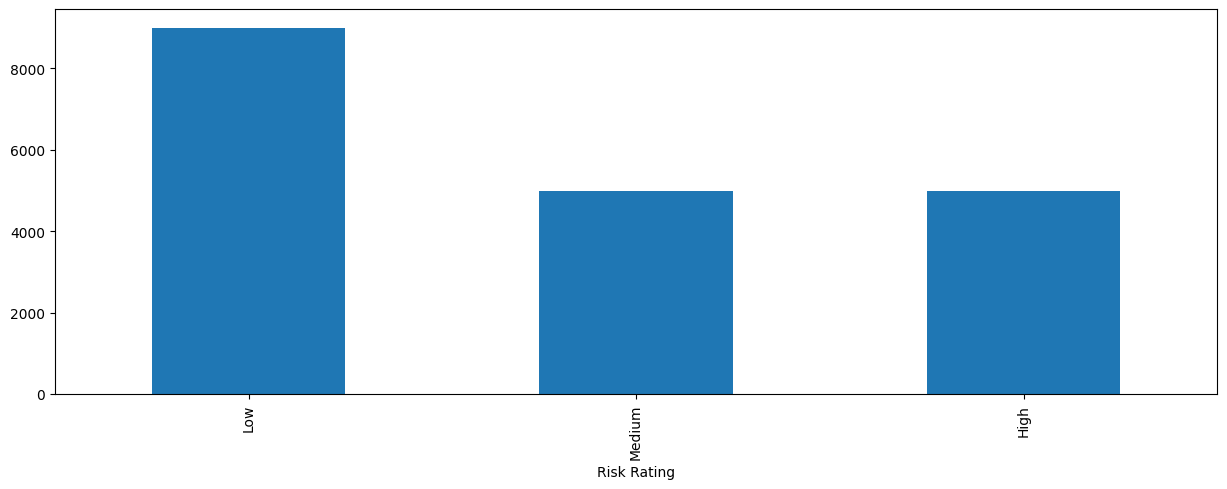

In [ ]:
for obj in obj_finan:
  print(obj)
  financial[obj].value_counts().plot(kind='bar', figsize=(15,5))

In [ ]:
numetric_cols = [f for f in financial.columns if financial[f].dtype!="O"]
numetric_cols

['Age',
 'Income',
 'Credit Score',
 'Loan Amount',
 'Years at Current Job',
 'Debt-to-Income Ratio',
 'Assets Value',
 'Number of Dependents',
 'Previous Defaults',
 'Marital Status Change']

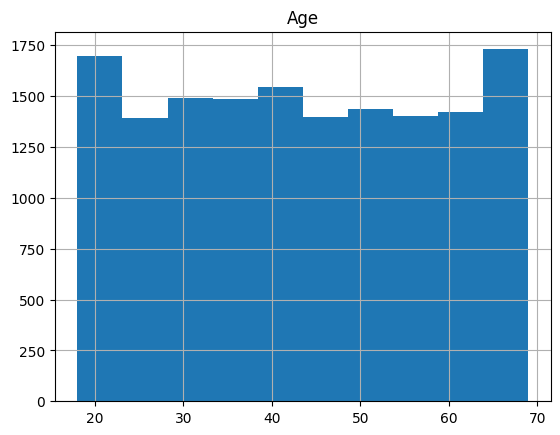

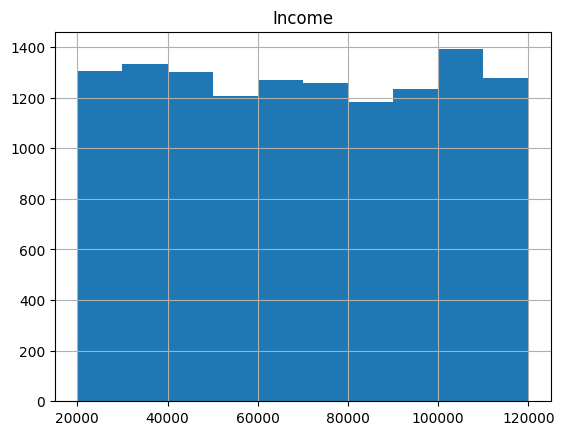

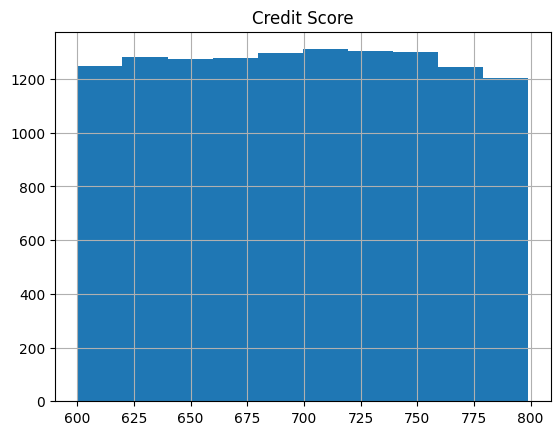

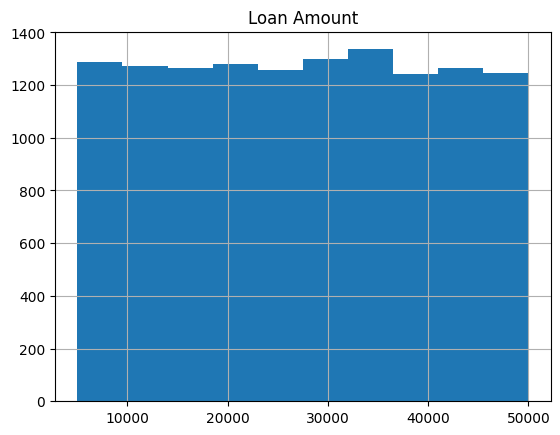

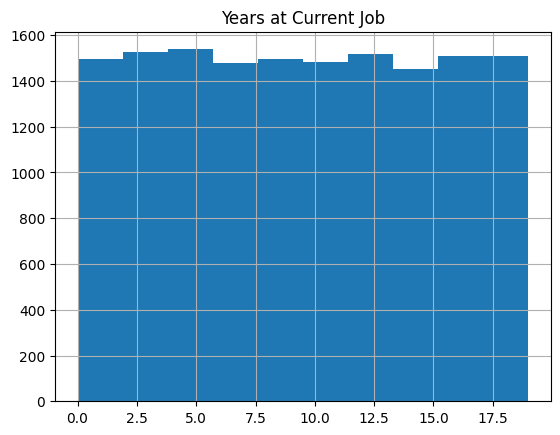

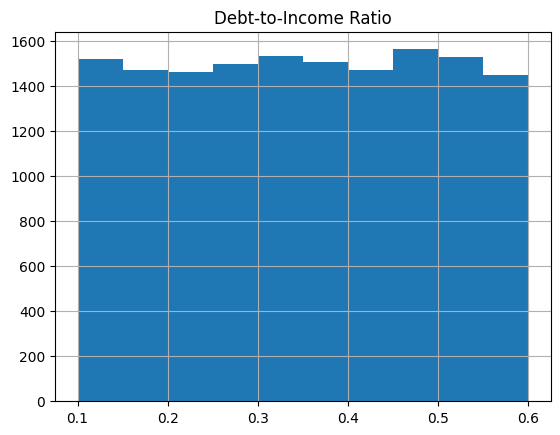

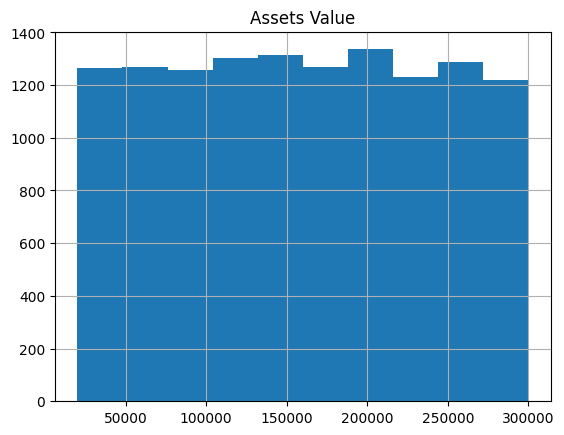

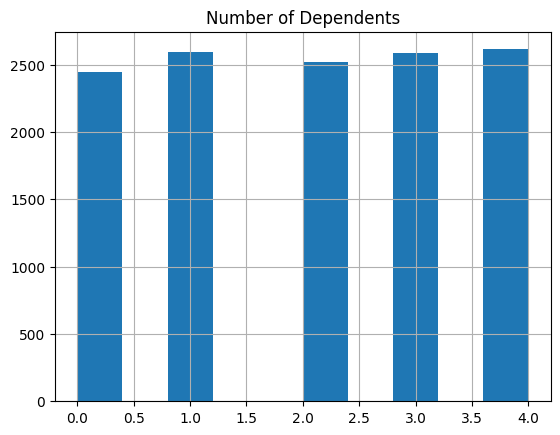

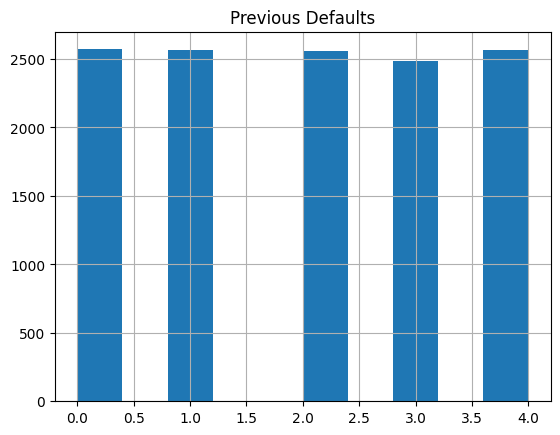

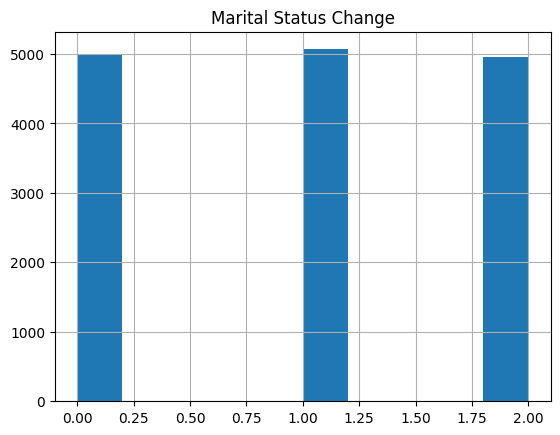

In [ ]:
for col in numetric_cols:
  financial[col].hist()
  plt.title(col)
  plt.show()

In [ ]:
dataset = financial.copy()

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
# Danh sách các cột phân loại cần mã hóa
categorical_columns = [
    'Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
    'Employment Status', 'Payment History', 'City', 'State', 'Country'
]


# Khởi tạo BinaryEncoder
encoder = ce.BinaryEncoder(cols=categorical_columns)

# Áp dụng mã hóa
df_encoded = encoder.fit_transform(dataset)
df_encoded

,Age,Gender_0,Gender_1,Education Level_0,Education Level_1,Education Level_2,Marital Status_0,Marital Status_1,Marital Status_2,Income,...,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Previous Defaults,Marital Status Change,Risk Rating
0,49,0,1,0,0,1,0,0,1,72799.0,...,0,0,0,0,0,0,1,2.0,2,Low
1,57,1,0,0,1,0,0,1,0,NaN,...,0,0,0,0,0,1,0,3.0,2,Medium
2,21,1,1,0,1,1,0,1,1,55687.0,...,0,0,0,0,0,1,1,3.0,2,Medium
3,59,0,1,0,1,0,0,1,1,26508.0,...,0,0,0,0,1,0,0,4.0,2,Medium
4,25,1,1,0,1,0,0,1,0,49427.0,...,0,0,0,0,1,0,1,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,1,1,0,1,0,0,1,0,48088.0,...,0,0,0,0,0,1,1,2.0,0,Low
14996,56,0,1,0,0,1,0,1,1,107193.0,...,0,1,0,0,0,1,0,0.0,0,Medium
14997,29,1,1,0,0,1,1,0,0,46250.0,...,0,0,1,1,1,0,0,2.0,1,High
14998,53,1,1,0,0,1,0,0,1,40180.0,...,0,1,0,0,0,0,1,0.0,2,High


In [ ]:

# Create a OneHotEncoder for nominal categorical features
onehot_encoder = OneHotEncoder(sparse=False)  # Sparse output for efficiency
categorical_columns = ['Risk Rating']
encoded_categorical = onehot_encoder.fit_transform(df_encoded[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out())

# Combine numerical and encoded data
onehoted_dataset = pd.concat([df_encoded.drop(categorical_columns, axis=1), encoded_categorical_df], axis=1)
onehoted_dataset

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Gender_0,Gender_1,Education Level_0,Education Level_1,Education Level_2,Marital Status_0,Marital Status_1,Marital Status_2,Income,...,Country_3,Country_4,Country_5,Country_6,Country_7,Previous Defaults,Marital Status Change,Risk Rating_High,Risk Rating_Low,Risk Rating_Medium
0,49,0,1,0,0,1,0,0,1,72799.0,...,0,0,0,0,1,2.0,2,0.0,1.0,0.0
1,57,1,0,0,1,0,0,1,0,NaN,...,0,0,0,1,0,3.0,2,0.0,0.0,1.0
2,21,1,1,0,1,1,0,1,1,55687.0,...,0,0,0,1,1,3.0,2,0.0,0.0,1.0
3,59,0,1,0,1,0,0,1,1,26508.0,...,0,0,1,0,0,4.0,2,0.0,0.0,1.0
4,25,1,1,0,1,0,0,1,0,49427.0,...,0,0,1,0,1,3.0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,1,1,0,1,0,0,1,0,48088.0,...,0,0,0,1,1,2.0,0,0.0,1.0,0.0
14996,56,0,1,0,0,1,0,1,1,107193.0,...,0,0,0,1,0,0.0,0,0.0,0.0,1.0
14997,29,1,1,0,0,1,1,0,0,46250.0,...,1,1,1,0,0,2.0,1,1.0,0.0,0.0
14998,53,1,1,0,0,1,0,0,1,40180.0,...,0,0,0,0,1,0.0,2,1.0,0.0,0.0


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_onehoted_dataset = imp_mean.fit_transform(onehoted_dataset)
imputed_onehoted_dataset

array([[49.,  0.,  1., ...,  0.,  1.,  0.],
       [57.,  1.,  0., ...,  0.,  0.,  1.],
       [21.,  1.,  1., ...,  0.,  0.,  1.],
       ...,
       [29.,  1.,  1., ...,  1.,  0.,  0.],
       [53.,  1.,  1., ...,  1.,  0.,  0.],
       [24.,  1.,  1., ...,  0.,  1.,  0.]])

In [ ]:
corr = onehoted_dataset.sample(frac=0.3, random_state=42).drop(["Risk Rating_High", "Risk Rating_Low", "Risk Rating_Medium"], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)
# Use .format(precision=2) to set the precision of the displayed values

,Age,Gender_0,Gender_1,Education Level_0,Education Level_1,Education Level_2,Marital Status_0,Marital Status_1,Marital Status_2,Income,Credit Score,Loan Amount,Loan Purpose_0,Loan Purpose_1,Loan Purpose_2,Employment Status_0,Employment Status_1,Years at Current Job,Payment History_0,Payment History_1,Payment History_2,Debt-to-Income Ratio,Assets Value,Number of Dependents,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,State_0,State_1,State_2,State_3,State_4,State_5,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Previous Defaults,Marital Status Change
Age,1.00,0.00,-0.00,-0.02,-0.01,0.02,0.01,-0.03,0.00,-0.03,0.01,-0.01,-0.00,0.01,-0.01,-0.00,0.00,-0.03,0.01,-0.03,0.00,-0.02,0.00,-0.02,-0.01,-0.02,0.02,0.00,0.00,-0.01,-0.01,-0.03,-0.01,0.01,-0.02,0.00,0.02,-0.00,-0.00,0.01,-0.00,0.02,0.03,0.02,-0.01,0.02,-0.02,-0.03,-0.02,0.02,-0.00,-0.04,-0.00,-0.01
Gender_0,0.00,1.00,-0.49,-0.01,-0.00,0.01,-0.01,0.00,0.00,-0.02,-0.00,0.00,-0.01,0.01,-0.00,-0.00,0.01,0.01,0.02,0.01,-0.02,0.02,0.00,0.00,0.02,-0.01,0.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.04,-0.01,-0.01,0.01,0.01,-0.01,-0.01,-0.02,-0.02,0.00,0.00,-0.01,0.01,-0.03,0.01,-0.02,-0.01,-0.03,-0.01
Gender_1,-0.00,-0.49,1.00,-0.02,0.01,0.02,0.01,-0.01,-0.00,0.04,0.01,-0.01,0.00,-0.01,0.01,-0.00,0.00,-0.01,0.00,-0.01,-0.00,0.01,0.01,0.00,-0.03,0.01,0.01,-0.02,0.00,0.02,-0.01,0.00,0.02,0.01,0.03,-0.01,0.01,0.03,-0.00,-0.01,0.02,0.00,0.04,0.02,-0.02,0.01,0.02,0.01,0.02,0.00,0.00,0.00,0.01,0.00
Education Level_0,-0.02,-0.01,-0.02,1.00,-0.58,-0.56,-0.01,0.02,0.03,-0.01,0.02,-0.02,-0.04,0.04,-0.00,0.00,0.01,0.01,0.02,-0.01,-0.02,-0.01,0.01,0.00,0.00,0.01,0.03,0.01,-0.00,-0.00,-0.02,0.01,-0.02,-0.02,0.00,-0.01,-0.00,-0.00,0.02,0.00,0.00,-0.00,0.00,-0.01,-0.03,-0.01,0.01,0.01,0.01,-0.01,-0.00,-0.01,0.04,0.02
Education Level_1,-0.01,-0.00,0.01,-0.58,1.00,-0.02,0.01,-0.02,-0.01,0.00,-0.02,0.00,0.02,-0.01,-0.02,-0.00,-0.02,-0.02,-0.01,0.01,0.01,0.01,-0.03,0.02,0.00,0.01,-0.02,-0.01,0.01,-0.01,0.02,0.01,0.01,0.02,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.00,-0.03,0.01,0.01,-0.00,0.01,-0.01,-0.01,-0.01,0.01,0.00,-0.00,-0.01,0.01
Education Level_2,0.02,0.01,0.02,-0.56,-0.02,1.00,0.00,-0.00,-0.03,0.03,0.01,0.02,0.02,-0.02,0.02,0.01,0.00,0.01,-0.02,-0.00,0.03,0.00,0.02,0.01,-0.01,-0.01,-0.03,0.01,0.02,0.00,0.01,-0.03,0.02,0.01,0.02,0.02,-0.01,0.01,0.00,0.02,-0.02,0.02,-0.01,0.01,0.03,0.01,0.00,-0.00,-0.02,-0.01,-0.02,0.01,-0.01,-0.02
Marital Status_0,0.01,-0.01,0.01,-0.01,0.01,0.00,1.00,-0.57,-0.57,-0.03,0.00,-0.01,0.00,0.02,0.01,0.02,0.01,-0.02,-0.00,0.00,0.01,-0.02,-0.02,-0.03,0.01,-0.01,-0.02,-0.03,0.01,-0.01,-0.00,-0.01,0.01,0.02,0.01,-0.03,-0.00,-0.02,0.01,0.00,-0.00,0.01,0.00,-0.02,0.01,0.00,0.00,-0.02,0.02,-0.00,-0.01,0.00,-0.01,0.01
Marital Status_1,-0.03,0.00,-0.01,0.02,-0.02,-0.00,-0.57,1.00,-0.02,0.02,-0.01,0.01,0.00,-0.03,0.01,0.01,-0.02,0.00,-0.01,0.03,-0.02,-0.00,0.02,0.03,-0.02,-0.00,0.01,0.03,-0.00,0.01,-0.01,0.02,-0.00,-0.02,0.00,0.01,-0.01,0.00,0.01,-0.01,-0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.01,0.00,0.03,-0.01,0.00,0.00
Marital Status_2,0.00,0.00,-0.00,0.03,-0.01,-0.03,-0.57,-0.02,1.00,0.01,-0.02,-0.01,-0.00,0.01,-0.03,-0.01,-0.01,0.04,0.02,-0.04,0.01,0.02,-0.00,-0.01,0.00,-0.01,0.00,0.01,-0.02,0.01,0.02,0.01,-0.02,-0.01,-0.02,0.02,0.03,0.01,-0.01,0.01,0.01,-0.02,0.02,0.01,-0.01,0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.00,0.01,0.00
Income,-0.03,-0.02,0.04,-0.01,0.00,0.03,-0.03,0.02,0.01,1.00,0.02,-0.02,0.01,-0.01,-0.02,0.01,0.02,0.02,0.01,0.00,-0.03,0.01,0.01,0.01,-0.02,-0.01,-0.00,-0.03,-0.00,0.02,-0.02,0.00,0.00,0.03,0.00,0.03,0.00,0.04,-0.01,-0.01,0.01,-0.03,0.02,0.01,-0.01,0.03,0.01,0.02,0.03,-0.01,0.04,-0.02,-0.01,0.00


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputed_onehoted_dataset_df = pd.DataFrame(imputed_onehoted_dataset,columns=onehoted_dataset.columns)
imputed_onehoted_dataset_df

,Age,Gender_0,Gender_1,Education Level_0,Education Level_1,Education Level_2,Marital Status_0,Marital Status_1,Marital Status_2,Income,...,Country_3,Country_4,Country_5,Country_6,Country_7,Previous Defaults,Marital Status Change,Risk Rating_High,Risk Rating_Low,Risk Rating_Medium
0,49.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,72799.00000,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0
1,57.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,69933.39851,...,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0
2,21.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,55687.00000,...,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0
3,59.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,26508.00000,...,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0
4,25.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49427.00000,...,0.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,48088.00000,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
14996,56.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,107193.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14997,29.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,46250.00000,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
14998,53.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40180.00000,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Tạo một MinMaxScaler
scaler = MinMaxScaler()

# Chọn các cột cần chuẩn hóa
imputed_onehoted_dataset_df[['Age', 'Income','Credit Score','Credit Score','Loan Amount','Years at Current Job','Debt-to-Income Ratio','Assets Value','Number of Dependents']] = scaler.fit_transform(imputed_onehoted_dataset_df[['Age', 'Income','Credit Score','Credit Score','Loan Amount','Years at Current Job','Debt-to-Income Ratio','Assets Value','Number of Dependents']])

imputed_onehoted_dataset_df

,Age,Gender_0,Gender_1,Education Level_0,Education Level_1,Education Level_2,Marital Status_0,Marital Status_1,Marital Status_2,Income,...,Country_3,Country_4,Country_5,Country_6,Country_7,Previous Defaults,Marital Status Change,Risk Rating_High,Risk Rating_Low,Risk Rating_Medium
0,0.607843,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.527982,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0
1,0.764706,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.499324,...,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0
2,0.058824,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.356849,...,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0
3,0.803922,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.065035,...,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0,1.0
4,0.137255,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.294244,...,0.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.098039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.280852,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
14996,0.745098,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.871950,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14997,0.215686,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.262471,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
14998,0.686275,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.201766,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0


In [ ]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')


In [ ]:
y = imputed_onehoted_dataset_df[["Risk Rating_High", "Risk Rating_Low", "Risk Rating_Medium"]]
X = imputed_onehoted_dataset_df.drop(["Risk Rating_High", "Risk Rating_Low", "Risk Rating_Medium"], axis=1)

#chia train, test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Tạo mô hình
model = RandomForestClassifier()

# Khởi tạo RFE, số lượng đặc trưng cần chọn là n_features_to_select
rfe = RFE(model, n_features_to_select=30)  # Chọn 30 đặc trưng tốt nhất

# Huấn luyện RFE
rfe = rfe.fit(x_train, y_train)

# Lấy danh sách các đặc trưng được chọn
selected_features = x_train.columns[rfe.support_]

# Lọc lại bộ dữ liệu chỉ với các đặc trưng quan trọng
X_train_rfe = x_train[selected_features]
X_test_rfe = x_test[selected_features]

print("Các đặc trưng được chọn:")
print(selected_features)


Các đặc trưng được chọn:
Index(['Age', 'Education Level_2', 'Marital Status_1', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose_2', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'City_4', 'City_6', 'City_8', 'City_9', 'City_11', 'City_12', 'City_13',
       'State_0', 'State_2', 'State_3', 'State_4', 'State_5', 'Country_0',
       'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Previous Defaults',
       'Marital Status Change'],
      dtype='object')


In [ ]:
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]
x_train_reshaped = x_train_selected.values.reshape(x_train_selected.shape[0], 1, x_train_selected.shape[1])
x_test_reshaped = x_test_selected.values.reshape(x_test_selected.shape[0], 1, x_test_selected.shape[1])
x_test_selected

,Age,Education Level_2,Marital Status_1,Income,Credit Score,Loan Amount,Loan Purpose_2,Years at Current Job,Debt-to-Income Ratio,Assets Value,...,State_3,State_4,State_5,Country_0,Country_3,Country_4,Country_5,Country_6,Previous Defaults,Marital Status Change
11499,0.647059,0.0,1.0,0.304704,0.341709,0.498911,1.0,0.105263,0.284238,0.449447,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,2.0
6475,0.941176,0.0,0.0,0.783433,0.944724,0.719388,1.0,0.684211,0.447870,0.292634,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.0
13167,0.882353,0.0,1.0,0.499324,0.844221,0.172785,1.0,0.526316,0.262485,0.074872,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.0
862,0.431373,1.0,0.0,0.525122,0.572864,0.039091,0.0,0.736842,0.330387,0.630715,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,0.0
5970,0.901961,1.0,1.0,0.499324,0.226131,0.095049,0.0,0.315789,0.141957,0.489437,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.992471,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0.333333,1.0,0.0,0.751390,0.562814,0.008689,0.0,0.157895,0.385787,0.498980,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.992471,1.0
3585,0.294118,0.0,0.0,0.766401,0.753769,0.498911,0.0,0.789474,0.771216,0.757109,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
10023,0.509804,1.0,0.0,0.233649,0.498036,0.498911,1.0,0.894737,0.776791,0.019122,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.000000,1.0
14044,0.862745,1.0,0.0,0.803134,0.507538,0.498911,1.0,0.368421,0.902424,0.498980,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0


In [ ]:
n_epochs = 100
batch_size = 32
learn_rate = 0.001
n_input = x_train_reshaped.shape[2]
n_neurons = 100
n_output = 3

In [ ]:
#my_model = Sequential()
#my_model.add(SimpleRNN(units=n_neurons, return_sequences=True, input_shape=(None, n_input)))
#my_model.add(TimeDistributed(Dense(units=n_output, activation="linear")))
my_model = Sequential()

# Thêm lớp RNN đầu tiên
my_model.add(SimpleRNN(units=n_neurons, return_sequences=True, input_shape=(None, n_input)))
my_model.add(Dropout(0.2))

# Thêm các lớp RNN tiếp theo
my_model.add(SimpleRNN(units=n_neurons, return_sequences=True))
my_model.add(Dropout(0.2))

my_model.add(SimpleRNN(units=n_neurons, return_sequences=False))
my_model.add(Dropout(0.2))

# Lớp Dense cuối cùng
my_model.add(Dense(units=n_output, activation="softmax"))

In [ ]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, None, 100)           │          13,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, None, 100)           │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,603 (209.39 KB)

 Trainable params: 53,603 (209.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
my_optimizer = Adam(learning_rate = learn_rate)
#my_model.compile(loss="mse", optimizer=my_optimizer, metrics = ["mse"])
my_model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is a DataFrame with one-hot encoded or multi-label target
# Convert each column to a 1D array of labels
y_train_encoded = np.array([label_encoder.fit_transform(y_train[col]) for col in y_train.columns]).T
y_train_encoded = np.argmax(y_train_encoded, axis=1)

# Create a LabelEncoder for each column
label_encoder = LabelEncoder()
# Fit the model using the encoded y_train
model = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=1.0)
model.fit(x_train, y_train_encoded)

# Assuming y_test is also a DataFrame with one-hot encoded or multi-label target
# Convert y_test to the same format as y_train_encoded
y_test_encoded = np.array([label_encoder.fit_transform(y_test[col]) for col in y_test.columns]).T
y_test_encoded = np.argmax(y_test_encoded, axis=1)

y_pred = model.predict(x_test)

# Evaluate the model using the encoded y_test
acc = accuracy_score(model.predict(x_test), y_test_encoded)
print('Accuracy ', acc, '\n')
print(classification_report(model.predict(x_test), y_test_encoded))

Accuracy  0.588 

              precision    recall  f1-score   support

           0       0.00      0.09      0.01        11
           1       0.98      0.59      0.74      2956
           2       0.01      0.33      0.02        33

    accuracy                           0.59      3000
   macro avg       0.33      0.34      0.26      3000
weighted avg       0.97      0.59      0.73      3000



In [ ]:
my_summary=my_model.fit(x_train_reshaped, y_train,
                        epochs=n_epochs, batch_size=batch_size, validation_data=(x_test_reshaped, y_test),verbose=1)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5749 - loss: 0.9456 - val_accuracy: 0.5923 - val_loss: 0.9195
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5921 - loss: 0.9212 - val_accuracy: 0.5930 - val_loss: 0.9251
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5940 - loss: 0.9163 - val_accuracy: 0.5930 - val_loss: 0.9186
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5885 - loss: 0.9214 - val_accuracy: 0.5930 - val_loss: 0.9147
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6024 - loss: 0.9039 - val_accuracy: 0.5930 - val_loss: 0.9251
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6026 - loss: 0.9015 - val_accuracy: 0.5930 - val_loss: 0.9147
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6006 - loss: 0.9009 - val_accuracy: 0.5930 - val_loss: 0.9254
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5922 - loss: 0.9117 - val_ac

In [ ]:
# Lấy các giá trị từ my_summary
acc = my_summary.history['accuracy']
val_acc = my_summary.history['val_accuracy']
loss = my_summary.history['loss']
val_loss = my_summary.history['val_loss']

# Số lượng epoch
epochs = range(1, len(acc) + 1)

# Vẽ đồ thị Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ đồ thị Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
x_test_reshaped = np.reshape(x_test_selected, (x_test_selected.shape[0], 1, x_test_selected.shape[1]))
y_pred = my_model.predict(x_test_reshaped)
# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')